# 0.0: pull packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
import numpy as np
import random
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, model_selection, ensemble, svm, naive_bayes, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import FactorAnalysis
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import getpass
import pyodbc
import sys
import sqlalchemy
import urllib
from datetime import date
from collections import Counter
import xgboost as xgb
from xgboost.sklearn import XGBClassifier, XGBRegressor
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import time
from catboost import Pool, CatBoostClassifier, CatBoostRegressor

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

## 0.1: pull data

In [3]:
df_sql = pd.DataFrame() 
df_sql['servers'] = ['HW2WIPSQL14',
                    'HW2WIPSQL10','HW2WIPSQL10','HW2WIPSQL10',
                    'PW2WIPSQL01',
                    'HW2WIPSQL13','HW2WIPSQL13','HW2WIPSQL13',
                    'HW2WIPSQL15','HW2WIPSQL15',
                    'HW2WIPSQL08']
df_sql['databases'] = ['Pareto_Arizona_ACA_RA',
                      'Pareto_Capital_V2_TEMP','Pareto_HarvardPilgrim','Pareto_Red_BCBS_Idaho',
                      'Sharp_ParetoRed_2017Q4',
                      'BCBSMN_ACA_RA_1536','BCBST_ACA_1548','Pareto_CareFirst_RPM_Analytics',
                      'BCBSM_ACA_RA','BCN_ACA_RA',
                      'KaiserWA_1093']

In [4]:
for a,b in zip(df_sql.servers, df_sql.databases): 
    if a == df_sql['servers'][0] and b == df_sql['databases'][0]:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
 
        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_001_ACA_Info')
        df_mem = pd.DataFrame(result.fetchall(),columns=result.keys())

    else:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_001_ACA_Info')
        df_mem = df_mem.append(pd.DataFrame(result.fetchall(),columns=result.keys()))
        df_mem['clientDB'] = df_mem['clientDB'].fillna(b)
        
    if a == df_sql['servers'][0] and b == df_sql['databases'][0]:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
 
        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_002_capturedconditions')
        df_cc = pd.DataFrame(result.fetchall(),columns=result.keys())
        df_cc['clientDB'] = b

    else:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_002_capturedconditions')
        df_cc = df_cc.append(pd.DataFrame(result.fetchall(),columns=result.keys()))
        df_cc['clientDB'] = df_cc['clientDB'].fillna(b)
        
    if a == df_sql['servers'][0] and b == df_sql['databases'][0]:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
 
        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_003_nonscoredconditions')
        df_noncc = pd.DataFrame(result.fetchall(),columns=result.keys())
        df_noncc['clientDB'] = b

    else:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_003_nonscoredconditions')
        df_noncc = df_noncc.append(pd.DataFrame(result.fetchall(),columns=result.keys()))
        df_noncc['clientDB'] = df_noncc['clientDB'].fillna(b)
        
    if a == df_sql['servers'][0] and b == df_sql['databases'][0]:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
 
        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_004_procedures')
        df_procs = pd.DataFrame(result.fetchall(),columns=result.keys())
        df_procs['clientDB'] = b

    else:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_004_procedures')
        df_procs = df_procs.append(pd.DataFrame(result.fetchall(),columns=result.keys()))
        df_procs['clientDB'] = df_procs['clientDB'].fillna(b)
        
    if a == df_sql['servers'][0] and b == df_sql['databases'][0]:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
 
        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_005_drugs')
        df_drugs = pd.DataFrame(result.fetchall(),columns=result.keys())
        df_drugs['clientDB'] = b

    else:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_005_drugs')
        df_drugs = df_drugs.append(pd.DataFrame(result.fetchall(),columns=result.keys()))
        df_drugs['clientDB'] = df_drugs['clientDB'].fillna(b)
        
    if a == df_sql['servers'][0] and b == df_sql['databases'][0]:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
 
        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_006_county_tpd')
        df_tpd = pd.DataFrame(result.fetchall(),columns=result.keys())

    else:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_006_county_tpd')
        df_tpd = df_tpd.append(pd.DataFrame(result.fetchall(),columns=result.keys()))
        df_tpd['clientDB'] = df_tpd['clientDB'].fillna(b)
        
    if a == df_sql['servers'][0] and b == df_sql['databases'][0]:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
 
        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_008_targets')
        df_targets = pd.DataFrame(result.fetchall(),columns=result.keys())

    else:
        params = urllib.parse.quote_plus("DSN={};DATABASE={};Trusted_Connection=yes".format(a,b))
        engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

        result = engine.execute('SELECT DISTINCT * FROM Y_DS_NewMember_008_targets')
        df_targets = df_targets.append(pd.DataFrame(result.fetchall(),columns=result.keys()))
        df_targets['clientDB'] = df_targets['clientDB'].fillna(b)

## 0.2: prepare data

In [5]:
df_cc_pivot = pd.pivot_table(df_cc, values='instances', index=['clientDSMemberKey','clientDB','active_year'], columns=['CC']).add_suffix('_captured')
df_noncc_pivot = pd.pivot_table(df_noncc, values='instances', index=['clientDSMemberKey','clientDB','active_year'], columns=['CC']).add_suffix('_noncaptured')
df_drugs['drug_subclass'] = pd.to_numeric(df_drugs.drug_subclass)
df_drugs100 = df_drugs[['drug_subclass','instances']].groupby('drug_subclass').sum().sort_values('instances',ascending=False)[0:100].reset_index()
df_drugs=df_drugs.merge(df_drugs100, how='inner', on='drug_subclass').drop('instances_y',axis=1)
df_drugs_pivot = pd.pivot_table(df_drugs, values='instances_x', index=['clientDSMemberKey','clientDB','active_year'],columns=['drug_subclass'])
df_drugs_pivot.columns = df_drugs_pivot.columns.astype(str)
df_procs['description'] = df_procs['category'] + "_" + df_procs['class']
df_procs_pivot = pd.pivot_table(df_procs, values='instances', index=['clientDSMemberKey','clientDB','active_year'],columns=['description'])
df_tpd_pivot = pd.pivot_table(df_tpd, values='value', index=['clientDSMemberKey','clientDB'],columns=['metric'])
df_noncc_pivot = df_noncc_pivot.reset_index()
df_cc_pivot = df_cc_pivot.reset_index()
df_drugs_pivot = df_drugs_pivot.reset_index()
df_procs_pivot = df_procs_pivot.reset_index()
df_tpd_pivot = df_tpd_pivot.reset_index()

In [6]:
df_final = pd.merge(df_mem, df_noncc_pivot, on=['clientDSMemberKey','clientDB','active_year'],how='left')
df_final = pd.merge(df_final, df_cc_pivot, on=['clientDSMemberKey','clientDB','active_year'],how='left')
df_final = pd.merge(df_final, df_drugs_pivot, on=['clientDSMemberKey','clientDB','active_year'],how='left')
df_final = pd.merge(df_final, df_procs_pivot, on=['clientDSMemberKey','clientDB','active_year'],how='left')
df_final = pd.merge(df_final, df_tpd_pivot, on=['clientDSMemberKey','clientDB'],how='left')

In [5]:
df_final.fillna(0, inplace = True)

In [6]:
df_final.head()

,Unnamed: 0,clientDSMemberKey,clientDB,metalLevel,age,sex,CSR_Indicator,ARF,AV,GCF,IDF,relationship,Drug_MOOP,Drug_Deductible,ER_Coinsurance,ER_Copay,IP_Coinsurance,IP_Copay,Med_Deductible,Med_MOOP,OP_Coinsurance,OP_Copay,PCP_Coinsurance,PCP_Copay,Spec_Coinsurance,Spec_Copay,UrgentCare_Coinsurance,UrgentCare_Copay,pro_claim_count,op_claim_count,ip_claim_count,active_year,medClaimTotal_x,rxClaimTotal_x,1_noncaptured,10_noncaptured,102_noncaptured,103_noncaptured,106_noncaptured,107_noncaptured,109_noncaptured,11_noncaptured,110_noncaptured,111_noncaptured,112_noncaptured,113_noncaptured,114_noncaptured,115_noncaptured,117_noncaptured,118_noncaptured,...,% Children in Poverty,% Disconnected Youth,% Excessive Drinking,% Food Insecure,% Long Commute - Drives Alone,% Low Birth Weight,% Mammography,% Obese,% Physically Inactive,% Receiving HbA1c,% Rural,% Severe Housing Problems,% Single-Parent Households,% Smokers,% Some College,% Unemployed,% Uninsured,% With Access to Places For Physical Activity,% With Limited Access to Healthy Foods,% in Fair or Poor Health,20th Percentile Household Income,80th Percentile Household Income,Age-Adjusted Mortality,Association Rate,Average Daily PM2.5,Child Mortality Rate,County Affected by Water Violation (Y/N),Dentist Rate,Drug Overdose Mortality Rate,Firearm Fatalities Rate,Food Environment Index,High School Graduation Rate,Infant Mortality Rate,Injury Death Rate,MHP Rate,Median Household Income,PCP Rate,Preventable Hosp. Rate,Price-adjusted Medicare Parts A & B reimbursements,Ratio of 80th Percentile HH income to 20th Percentile HH Income,Teen Birth Rate,Violent Crime Rate,Years of Potential Life Lost Rate,TotalRiskTarget,medClaimTotal_y,rxClaimTotal_y,Coverage_Months_Actual,sumCost,drops,riskCatActual
0,0,59,Pareto_Arizona_ACA_RA,4,42,0,0,1.302,0.9,1.0,1.15,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,2019,362.10,23.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.2,15.29,21.035736,15.0,49.9,7.038927,58.345910,25.9,26.4,82.413628,22.725597,15.982291,23.819573,14.157845,64.063276,4.927146,15.647850,82.736875,5.855056,14.139616,30506.0,143883.0,309.4,6.045848,11.4,44.592062,1.0,45.48699,10.603277,12.245402,7.5,92.400000,5.294479,51.677139,69.39912,72506.0,61.76066,62.32,12032.84,4.716548,30.381475,171.147846,5936.512584,0.934,5479.63,458.72,12.166666,5938.35,0,low
1,1,67,Pareto_Arizona_ACA_RA,5,7,0,0,0.635,0.7,1.0,1.03,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2019,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.5,15.47,18.537748,15.0,36.8,7.028963,65.601154,26.3,19.0,83.852202,2.363800,19.282848,35.034791,13.749257,64.643541,4.513374,12.452463,92.214307,4.399473,14.634311,24281.0,110720.0,302.7,5.156016,10.3,47.895027,1.0,65.75541,17.594625,13.423169,7.6,77.991851,5.680601,69.702679,121.96568,58742.0,70.85023,33.54,9602.58,4.559944,31.176334,402.512097,6146.527531,0.068,249.25,0.00,12.166666,249.25,0,low
2,2,107,Pareto_Arizona_ACA_RA,1,22,1,0,1.000,0.6,1.0,1.00,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2019,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.5,15.47,18.537748,15.0,36.8,7.028963,65.601154,26.3,19.0,83.852202,2.363800,19.282848,35.034791,13.749257,64.643541,4.513374,12.452463,92.214307,4.399473,14.634311,24281.0,110720.0,302.7,5.156016,10.3,47.895027,1.0,65.75541,17.594625,13.423169,7.6,77.991851,5.680601,69.702679,121.96568,58742.0,70.85023,33.54,9602.58,4.559944,31.176334,402.512097,6146.527531,0.091,0.00,0.00,9.100000,0.00,0,low
3,3,178,Pareto_Arizona_ACA_RA,5,18,1,0,0.635,0.7,1.0,1.03,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2019,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.5,15.47,18.537748,15.0,36.8,7.028963,65.601154,26.3,19.0,83.852202,2.363800,19.282848,35.034791,13.749257,64.643541,4.513374,12.452463,92.214307,4.399473,14.634311,24281.0,110720.0,302.7,5.156016,10.3,47.895027,1.0,6

In [9]:
df_final['sex'] = df_final['sex'].map({'M':1, 'F':0})
df_final['relationship']=df_final['relationship'].map({' ':0})

In [10]:
del df_noncc_pivot
del df_cc_pivot
del df_drugs_pivot
del df_procs_pivot
del df_tpd_pivot
del df_noncc
del df_cc
del df_drugs
del df_procs
del df_tpd

In [11]:
df_final = pd.merge(df_final, df_targets, on=['clientDSMemberKey','clientDB','active_year'],how='inner')

## 0.3: prepare targets and features

In [12]:
df_final['sumCost'] = df_final['medClaimTotal_y']+df_final['rxClaimTotal_y']
df_final['drops'] = ((df_final['Coverage_Months_Actual'] <= 1) & (df_final['Coverage_Months_Actual'] > 0))*1

In [13]:
df_final['medClaimTotal_x']=df_final['medClaimTotal_x'].astype('float')
df_final['rxClaimTotal_x']=df_final['rxClaimTotal_x'].astype('float')
df_final['sumCost']=df_final['sumCost'].astype('float')

In [36]:
df_final['metalLevel']=df_final['metalLevel'].astype('int')

In [7]:
features = ['metalLevel', 'age', 'sex', 'CSR_Indicator', 'ARF', 'AV', 'GCF', 'IDF', 'relationship', 'Drug_MOOP', 'Drug_Deductible', 'ER_Coinsurance', 'ER_Copay', 'IP_Coinsurance', 'IP_Copay', 'Med_Deductible', 'Med_MOOP', 'OP_Coinsurance', 'OP_Copay', 'PCP_Coinsurance', 'PCP_Copay', 'Spec_Coinsurance', 'Spec_Copay', 'UrgentCare_Coinsurance', 'UrgentCare_Copay', 'pro_claim_count', 'op_claim_count', 'ip_claim_count', 'medClaimTotal_x', 'rxClaimTotal_x', '1_noncaptured', '2_noncaptured', '3_noncaptured', '4_noncaptured', '6_noncaptured', '8_noncaptured', '9_noncaptured', '10_noncaptured', '11_noncaptured', '12_noncaptured', '13_noncaptured', '18_noncaptured', '19_noncaptured', '20_noncaptured', '21_noncaptured', '23_noncaptured', '26_noncaptured', '27_noncaptured', '28_noncaptured', '29_noncaptured', '30_noncaptured', '34_noncaptured', '35_noncaptured', '36_noncaptured', '37_noncaptured', '38_noncaptured', '41_noncaptured', '42_noncaptured', '45_noncaptured', '46_noncaptured', '47_noncaptured', '48_noncaptured', '54_noncaptured', '55_noncaptured', '56_noncaptured', '57_noncaptured', '61_noncaptured', '62_noncaptured', '63_noncaptured', '64_noncaptured', '66_noncaptured', '67_noncaptured', '68_noncaptured', '69_noncaptured', '70_noncaptured', '71_noncaptured', '73_noncaptured', '74_noncaptured', '75_noncaptured', '81_noncaptured', '82_noncaptured', '87_noncaptured', '88_noncaptured', '89_noncaptured', '90_noncaptured', '94_noncaptured', '96_noncaptured', '97_noncaptured', '102_noncaptured', '103_noncaptured', '107_noncaptured', '109_noncaptured', '110_noncaptured', '111_noncaptured', '112_noncaptured', '113_noncaptured', '114_noncaptured', '115_noncaptured', '117_noncaptured', '118_noncaptured', '119_noncaptured', '120_noncaptured', '121_noncaptured', '122_noncaptured', '125_noncaptured', '126_noncaptured', '127_noncaptured', '128_noncaptured', '129_noncaptured', '130_noncaptured', '131_noncaptured', '132_noncaptured', '135_noncaptured', '137_noncaptured', '138_noncaptured', '139_noncaptured', '142_noncaptured', '145_noncaptured', '146_noncaptured', '149_noncaptured', '150_noncaptured', '151_noncaptured', '153_noncaptured', '154_noncaptured', '156_noncaptured', '158_noncaptured', '159_noncaptured', '160_noncaptured', '161_noncaptured', '162_noncaptured', '163_noncaptured', '183_noncaptured', '184_noncaptured', '187_noncaptured', '188_noncaptured', '203_noncaptured', '204_noncaptured', '205_noncaptured', '207_noncaptured', '208_noncaptured', '209_noncaptured', '217_noncaptured', '226_noncaptured', '227_noncaptured', '243_noncaptured', '244_noncaptured', '245_noncaptured', '246_noncaptured', '247_noncaptured', '248_noncaptured', '249_noncaptured', '251_noncaptured', '253_noncaptured', '254_noncaptured', '1_captured', '2_captured', '3_captured', '4_captured', '6_captured', '8_captured', '9_captured', '10_captured', '11_captured', '12_captured', '13_captured', '18_captured', '19_captured', '20_captured', '21_captured', '23_captured', '26_captured', '27_captured', '28_captured', '29_captured', '30_captured', '34_captured', '35_captured', '36_captured', '37_captured', '38_captured', '41_captured', '42_captured', '45_captured', '46_captured', '47_captured', '48_captured', '54_captured', '55_captured', '56_captured', '57_captured', '61_captured', '62_captured', '63_captured', '64_captured', '66_captured', '67_captured', '68_captured', '69_captured', '70_captured', '71_captured', '73_captured', '74_captured', '75_captured', '81_captured', '82_captured', '87_captured', '88_captured', '89_captured', '90_captured', '94_captured', '96_captured', '97_captured', '102_captured', '103_captured', '106_captured', '107_captured', '108_captured', '109_captured', '110_captured', '111_captured', '112_captured', '113_captured', '114_captured', '115_captured', '117_captured', '118_captured', '119_captured', '120_captured', '121_captured', '122_captured', '125_captured', '126_captured', '127_captured', '128_captured', '129_captured', '130_captured', '131_captured', '132_captured', '135_captured', '137_captured', '138_captured', '139_captured', '142_captured', '145_captured', '146_captured', '149_captured', '150_captured', '151_captured', '153_captured', '154_captured', '156_captured', '158_captured', '159_captured', '160_captured', '161_captured', '162_captured', '163_captured', '183_captured', '184_captured', '187_captured', '188_captured', '203_captured', '204_captured', '205_captured', '207_captured', '208_captured', '209_captured', '217_captured', '226_captured', '227_captured', '242_captured', '243_captured', '244_captured', '245_captured', '246_captured', '247_captured', '248_captured', '249_captured', '251_captured', '253_captured', '254_captured', '12000', '19900', '21000', '23000', '34000', '40000', '50000', '114070', '160000', '162200', '169900', '213000', '221000', '231000', '240000', '259700', '259900', '259910', '259920', '260000', '271040', '271700', '272000', '272500', '275500', '277000', '281000', '300420', '331000', '332000', '333000', '340000', '361000', '361500', '362010', '369918', '369940', '372000', '375000', '376000', '379900', '392000', '394000', '422000', '431020', '442010', '442099', '444000', '445050', '469920', '492000', '492700', '502500', '530000', '541000', '568520', '571000', '572000', '581200', '581600', '581800', '582000', '583000', '591530', '592500', '602040', '611000', '611099', '614000', '651000', '652000', '659900', '659910', '659917', '661000', '674060', '680000', '721000', '726000', '751000', '772020', '797000', '822000', '832000', '833700', '851580', '861010', '900500', '905500', '941000', '970510', 'anesthesia_burn excisions or debridement', 'anesthesia_forearm, wrist and hand', 'anesthesia_head', 'anesthesia_intrathoracic', 'anesthesia_knee and popliteal area', 'anesthesia_lower abdomen', 'anesthesia_lower leg (below knee)', 'anesthesia_neck', 'anesthesia_obstetric', 'anesthesia_other procedures', 'anesthesia_pelvis (except hip)', 'anesthesia_perineum', 'anesthesia_qualifying circumstances for anesthesia', 'anesthesia_radiological procedures', 'anesthesia_shoulder and axillary', 'anesthesia_spine and spinal cord', 'anesthesia_thorax', 'anesthesia_upper abdomen', 'anesthesia_upper arm and elbow', 'anesthesia_upper leg (except knee)', 
'evaluation and management_Care plan oversight services', 'evaluation and management_Case management services', 'evaluation and management_Complex chronic care coordination services', 'evaluation and management_Consultations', 'evaluation and management_Critical care services',  
'evaluation and management_Domiciliary, rest home (boarding home) or custodial care services', 'evaluation and management_Emergency department services', 
'evaluation and management_Home health services', 'evaluation and management_Hospital inpatient services', 'evaluation and management_Hospital observation services', 
'evaluation and management_Inpatient neonatal intensive, and pediatric/neonatal critical, care services', 'evaluation and management_Newborn care services', 
'evaluation and management_Non-face-to-face physician services', 'evaluation and management_Nursing facility services', 'evaluation and management_Office/other outpatient services', 
'evaluation and management_Other evaluation and management services', 'evaluation and management_Preventive medicine services', 'evaluation and management_Prolonged services', 
'evaluation and management_Special evaluation and management services', 'evaluation and management_Transitional care management services', 'medicine_acupuncture', 
'medicine_allergy and clinical immunology', 'medicine_biofeedback', 'medicine_cardiovascular', 
'medicine_central nervous system assessments/tests (neuro-cognitive, mental status, speech testing)', 'medicine_chiropractic manipulative treatment', 'medicine_dialysis', 
'medicine_education and training for patient self-management', 'medicine_endocrinology', 'medicine_gastroenterology', 'medicine_health and behavior assessment/intervention', 
'medicine_home health procedures/services', 
'medicine_hydration, therapeutic, prophylactic, diagnostic injections and infusions, and chemotherapy and other highly complex drug or highly complex biologic agent administration', 'medicine_immune globulins, serum or recombinant prods', 'medicine_immunization administration for vaccines/toxoids', 'medicine_medical nutrition therapy', 
'medicine_medication therapy management services', 'medicine_neurology and neuromuscular procedures', 'medicine_non-face-to-face nonphysician services', 
'medicine_noninvasive vascular diagnostic studies', 'medicine_ophthalmology', 'medicine_osteopathic manipulative treatment', 'medicine_other services and procedures', 'medicine_photodynamic therapy', 'medicine_physical medicine and rehabilitation', 'medicine_psychiatry', 'medicine_pulmonary', 'medicine_special dermatological procedures', 'medicine_special otorhinolaryngologic services', 'medicine_special services, procedures and reports', 'medicine_vaccines, toxoids', 'pathology and laboratory_chemistry', 'pathology and laboratory_consultations (clinical pathology)', 'pathology and laboratory_cytogenetic studies', 'pathology and laboratory_cytopathology', 
'pathology and laboratory_evocative/suppression testing', 'pathology and laboratory_hematology and coagulation', 'pathology and laboratory_immunology', 
'pathology and laboratory_in vivo (transcutaneous) lab procedures', 'pathology and laboratory_microbiology', 'pathology and laboratory_organ or disease-oriented panels', 
'pathology and laboratory_other procedures', 'pathology and laboratory_reproductive medicine procedures', 'pathology and laboratory_surgical pathology', 
'pathology and laboratory_therapeutic drug assays', 'pathology and laboratory_transfusion medicine', 'pathology and laboratory_urinalysis', 'radiology_bone/joint studies', 
'radiology_breast mammography', 'radiology_diagnostic radiology', 'radiology_diagnostic ultrasound', 'radiology_nuclear medicine', 'radiology_radiation oncology', 
'radiology_radiologic guidance', 'surgery_auditory system', 'surgery_cardiovascular system', 'surgery_digestive system', 'surgery_endocrine system', 'surgery_eye and ocular adnexa', 'surgery_female genital system', 'surgery_general', 'surgery_hemic and lymphatic systems', 'surgery_integumentary system', 'surgery_male genital system', 'surgery_maternity care and delivery', 'surgery_mediastinum and diaphragm', 'surgery_musculoskeletal system', 'surgery_nervous system', 'surgery_reproductive system and intersex', 'surgery_respiratory system', 
'surgery_urinary system', '# Alcohol-Impaired Driving Deaths', '# Chlamydia Cases', '# Dentists', '# Diabetics', '# Driving Deaths', '# Firearm Fatalities', '# Households', 
'# Households with Severe Problems', '# Injury Deaths', '# Mental Health Providers', '# Primary Care Physicians', '# Single-Parent Households', '# of Social Associations', 
'% Alcohol-Impaired', '% Children in Poverty', '% Disconnected Youth', '% Excessive Drinking', '% Food Insecure', '% Long Commute - Drives Alone', '% Low Birth Weight', 
'% Mammography', '% Obese', '% Physically Inactive', '% Receiving HbA1c', '% Rural', '% Severe Housing Problems', '% Single-Parent Households', '% Smokers', '% Some College', '% Unemployed', 
'% Uninsured', '% With Access to Places For Physical Activity', '% With Limited Access to Healthy Foods', '% in Fair or Poor Health', '20th Percentile Household Income', 
'80th Percentile Household Income', 'Age-Adjusted Mortality', 'Association Rate', 'Average Daily PM2.5', 'Child Mortality Rate', 'County Affected by Water Violation (Y/N)', 'Dentist Rate', 'Drug Overdose Mortality Rate', 'Firearm Fatalities Rate', 'Food Environment Index', 'High School Graduation Rate', 'Infant Mortality Rate', 'Injury Death Rate', 'MHP Rate', 
'Median Household Income', 'PCP Rate', 'Preventable Hosp. Rate', 'Price-adjusted Medicare Parts A & B reimbursements', 'Ratio of 80th Percentile HH income to 20th Percentile HH Income', 
'Teen Birth Rate', 'Violent Crime Rate', 'Years of Potential Life Lost Rate']

# 1.0: sumcost model - catboost

In [15]:
df_final.loc[df_final['sumCost']/12 < 100, 'costCatActual'] = 'low'
df_final.loc[df_final['sumCost']/12 >= 2500, 'costCatActual'] = 'high'
df_final.fillna({'costCatActual':'med'}, inplace = True)

In [16]:
df_final['costCatActual'].value_counts()

low     1033433
med      426098
high      59932
Name: costCatActual, dtype: int64

In [24]:
df_final.loc[df_final['sumCost']/12 >= 12000]

,clientDSMemberKey,clientDB,metalLevel,age,sex,CSR_Indicator,ARF,AV,GCF,IDF,relationship,Drug_MOOP,Drug_Deductible,ER_Coinsurance,ER_Copay,IP_Coinsurance,IP_Copay,Med_Deductible,Med_MOOP,OP_Coinsurance,OP_Copay,PCP_Coinsurance,PCP_Copay,Spec_Coinsurance,Spec_Copay,UrgentCare_Coinsurance,UrgentCare_Copay,pro_claim_count,op_claim_count,ip_claim_count,active_year,medClaimTotal_x,rxClaimTotal_x,1_noncaptured,10_noncaptured,102_noncaptured,103_noncaptured,106_noncaptured,107_noncaptured,109_noncaptured,11_noncaptured,110_noncaptured,111_noncaptured,112_noncaptured,113_noncaptured,114_noncaptured,115_noncaptured,117_noncaptured,118_noncaptured,119_noncaptured,...,% Children in Poverty,% Disconnected Youth,% Excessive Drinking,% Food Insecure,% Long Commute - Drives Alone,% Low Birth Weight,% Mammography,% Obese,% Physically Inactive,% Receiving HbA1c,% Rural,% Severe Housing Problems,% Single-Parent Households,% Smokers,% Some College,% Unemployed,% Uninsured,% With Access to Places For Physical Activity,% With Limited Access to Healthy Foods,% in Fair or Poor Health,20th Percentile Household Income,80th Percentile Household Income,Age-Adjusted Mortality,Association Rate,Average Daily PM2.5,Child Mortality Rate,County Affected by Water Violation (Y/N),Dentist Rate,Drug Overdose Mortality Rate,Firearm Fatalities Rate,Food Environment Index,High School Graduation Rate,Infant Mortality Rate,Injury Death Rate,MHP Rate,Median Household Income,PCP Rate,Preventable Hosp. Rate,Price-adjusted Medicare Parts A & B reimbursements,Ratio of 80th Percentile HH income to 20th Percentile HH Income,Teen Birth Rate,Violent Crime Rate,Years of Potential Life Lost Rate,TotalRiskTarget,medClaimTotal_y,rxClaimTotal_y,Coverage_Months_Actual,sumCost,drops,costCatActual
21,873,Pareto_Arizona_ACA_RA,5,43,0,0,1.325,0.7,1.0,1.03,NaN,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,11,0,0,2019,3951.67,3419.0200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.5,15.47,18.537748,15.0,36.8,7.028963,65.601154,26.3,19.0,83.852202,2.363800,19.282848,35.034791,13.749257,64.643541,4.513374,12.452463,92.214307,4.399473,14.634311,24281.0,110720.0,302.7,5.156016,10.3,47.895027,1.0,65.75541,17.594625,13.423169,7.6,77.991851,5.680601,69.702679,121.96568,58742.0,70.85023,33.54,9602.58,4.559944,31.176334,402.512097,6146.527531,19.236000,140650.4200,11625.2900,12.166666000000000,152275.71,0,high
143,3727,Pareto_Arizona_ACA_RA,1,57,0,0,2.333,0.6,1.0,1.00,NaN,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,5,0,2019,7708.87,80.8700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.7,25.18,15.512074,19.1,16.6,7.091204,61.470007,30.4,30.1,82.243902,22.963644,17.602136,41.829258,20.027790,46.234453,6.581957,13.975989,65.458623,20.012130,20.853262,18410.0,75422.0,503.1,6.251923,5.9,64.813100,1.0,38.48983,28.695013,26.674224,5.4,76.874512,6.197142,119.543675,67.72262,42003.0,47.37786,54.61,9210.51,4.096795,37.463119,197.763635,10556.518664,91.640000,580823.1800,7244.4900,12.166666000000000,588067.67,0,high
826,21527,Pareto_Arizona_ACA_RA,5,61,0,3,2.714,0.7,1.0,1.03,NaN,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,10.0,0.0,50.0,0.0,75.0,8,1,0,2019,8633.85,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.7,25.18,15.512074,19.1,16.6,7.091204,61.470007,30.4,30.1,82.243902,22.963644,17.602136,41.829258,20.027790,46.234453,6.581957,13.975989,65.458623,20.012130,20.853262,18410.0,75422.0,503.1,6.251923,5.9,64.813100,1.0,38.48983,28.695013,26.674224,5.4,76.874512,6.197142,119.543675,67.72262,42003.0,47.37786,54.61,9210.51,4.096795,37.463119,197.763635,10556.518664,67.914724,697910.6700,1548.9300,12.166665000000000,699459.60,0,high
1921,49915,Pareto_Arizona_ACA_RA,5,37,1,2,1.230,0.7,1.0,1.03,NaN,0,0,10.0,0,10.0,0,0,0,10.0,0,0.0,10.0,0.0,25.0,0.0,40.0,0,0,0,2019,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.7,35.90,15.137849,23.0,24.3,8.572441,46.250000,31.4,25.9,59.893333,54.13824

In [28]:
##very high testing
df_final.loc[df_final['sumCost']/12 < 100, 'costCatActual'] = 'low'
df_final.loc[(df_final['sumCost']/12 >= 2500) & (df_final['sumCost']/12 < 12000), 'costCatActual'] = 'high'
df_final.loc[df_final['sumCost']/12 >= 12000, 'costCatActual'] = 'very high'
df_final.fillna({'costCatActual':'med'}, inplace = True)

In [29]:
df_final['costCatActual'].value_counts()

low          1033433
med           426098
high           46941
very high      12991
Name: costCatActual, dtype: int64

In [3]:
df_final = pd.read_csv('/mnt/h/02_NoPHI/DataScience/01_ModelScripts/ACA_NewMember/Archive/df_final_month01.csv')

In [4]:
df_final.head()

,Unnamed: 0,clientDSMemberKey,clientDB,metalLevel,age,sex,CSR_Indicator,ARF,AV,GCF,IDF,relationship,Drug_MOOP,Drug_Deductible,ER_Coinsurance,ER_Copay,IP_Coinsurance,IP_Copay,Med_Deductible,Med_MOOP,OP_Coinsurance,OP_Copay,PCP_Coinsurance,PCP_Copay,Spec_Coinsurance,Spec_Copay,UrgentCare_Coinsurance,UrgentCare_Copay,pro_claim_count,op_claim_count,ip_claim_count,active_year,medClaimTotal_x,rxClaimTotal_x,1_noncaptured,10_noncaptured,102_noncaptured,103_noncaptured,106_noncaptured,107_noncaptured,109_noncaptured,11_noncaptured,110_noncaptured,111_noncaptured,112_noncaptured,113_noncaptured,114_noncaptured,115_noncaptured,117_noncaptured,118_noncaptured,...,% Children in Poverty,% Disconnected Youth,% Excessive Drinking,% Food Insecure,% Long Commute - Drives Alone,% Low Birth Weight,% Mammography,% Obese,% Physically Inactive,% Receiving HbA1c,% Rural,% Severe Housing Problems,% Single-Parent Households,% Smokers,% Some College,% Unemployed,% Uninsured,% With Access to Places For Physical Activity,% With Limited Access to Healthy Foods,% in Fair or Poor Health,20th Percentile Household Income,80th Percentile Household Income,Age-Adjusted Mortality,Association Rate,Average Daily PM2.5,Child Mortality Rate,County Affected by Water Violation (Y/N),Dentist Rate,Drug Overdose Mortality Rate,Firearm Fatalities Rate,Food Environment Index,High School Graduation Rate,Infant Mortality Rate,Injury Death Rate,MHP Rate,Median Household Income,PCP Rate,Preventable Hosp. Rate,Price-adjusted Medicare Parts A & B reimbursements,Ratio of 80th Percentile HH income to 20th Percentile HH Income,Teen Birth Rate,Violent Crime Rate,Years of Potential Life Lost Rate,TotalRiskTarget,medClaimTotal_y,rxClaimTotal_y,Coverage_Months_Actual,sumCost,drops,riskCatActual
0,0,59,Pareto_Arizona_ACA_RA,4,42,0,0,1.302,0.9,1.0,1.15,NaN,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,2019,362.10,23.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.2,15.29,21.035736,15.0,49.9,7.038927,58.345910,25.9,26.4,82.413628,22.725597,15.982291,23.819573,14.157845,64.063276,4.927146,15.647850,82.736875,5.855056,14.139616,30506.0,143883.0,309.4,6.045848,11.4,44.592062,1.0,45.48699,10.603277,12.245402,7.5,92.400000,5.294479,51.677139,69.39912,72506.0,61.76066,62.32,12032.84,4.716548,30.381475,171.147846,5936.512584,0.934,5479.63,458.72,12.166666,5938.35,0,low
1,1,67,Pareto_Arizona_ACA_RA,5,7,0,0,0.635,0.7,1.0,1.03,NaN,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2019,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.5,15.47,18.537748,15.0,36.8,7.028963,65.601154,26.3,19.0,83.852202,2.363800,19.282848,35.034791,13.749257,64.643541,4.513374,12.452463,92.214307,4.399473,14.634311,24281.0,110720.0,302.7,5.156016,10.3,47.895027,1.0,65.75541,17.594625,13.423169,7.6,77.991851,5.680601,69.702679,121.96568,58742.0,70.85023,33.54,9602.58,4.559944,31.176334,402.512097,6146.527531,0.068,249.25,0.00,12.166666,249.25,0,low
2,2,107,Pareto_Arizona_ACA_RA,1,22,1,0,1.000,0.6,1.0,1.00,NaN,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2019,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.5,15.47,18.537748,15.0,36.8,7.028963,65.601154,26.3,19.0,83.852202,2.363800,19.282848,35.034791,13.749257,64.643541,4.513374,12.452463,92.214307,4.399473,14.634311,24281.0,110720.0,302.7,5.156016,10.3,47.895027,1.0,65.75541,17.594625,13.423169,7.6,77.991851,5.680601,69.702679,121.96568,58742.0,70.85023,33.54,9602.58,4.559944,31.176334,402.512097,6146.527531,0.091,0.00,0.00,9.100000,0.00,0,low
3,3,178,Pareto_Arizona_ACA_RA,5,18,1,0,0.635,0.7,1.0,1.03,NaN,0,0,0.0,0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2019,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.5,15.47,18.537748,15.0,36.8,7.028963,65.601154,26.3,19.0,83.852202,2.363800,19.282848,35.034791,13.749257,64.643541,4.513374,12.452463,92.214307,4.399473,14.634311,24281.0,110720.0,302.7,5.156016,10.3,47.895027,1.0,6

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_final[features], df_final['costCatActual'], test_size=0.1,random_state=5)
categorical_features_indices = np.where(df_final[features].dtypes != np.float)[0]

KeyError: 'costCatActual'

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
def modelfit_classification(alg, X_train, y_train, X_test, y_test, categorical_features_indices, useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, categorical_features_indices)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Predict test set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_train, dtrain_predictions))
    print(classification_report(y_train, dtrain_predictions))
    print(confusion_matrix(y_train, dtrain_predictions, labels = ['low', 'med', 'high']))
    cnf_matrix = confusion_matrix(y_train, dtrain_predictions, labels = ['low', 'med', 'high'])
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['low', 'med', 'high'],
                      title='Confusion matrix, without normalization')
    
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_test.values, dtest_predictions))
    print(classification_report(y_test, dtest_predictions))
    print(confusion_matrix(y_test, dtest_predictions, labels = ['low', 'med', 'high']))
    cnf_matrix = confusion_matrix(y_test, dtest_predictions, labels = ['low', 'med', 'high'])
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['low', 'med', 'high'],
                      title='Confusion matrix, without normalization')
                    
    feat_imp = pd.DataFrame({'features':features})
    feat_imp['importance'] = alg.feature_importances_
    feat_imp = feat_imp.sort_values(by = 'importance', ascending=False).head(20)
    feat_imp.plot(x='features', y='importance', kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

# 1.1: test very high cost

0:	learn: 0.7358078	total: 5.43s	remaining: 22m 33s
10:	learn: 0.7499371	total: 58.4s	remaining: 21m 9s
20:	learn: 0.7530164	total: 1m 50s	remaining: 20m 2s
30:	learn: 0.7565542	total: 2m 39s	remaining: 18m 49s
40:	learn: 0.7598003	total: 3m 30s	remaining: 17m 51s
50:	learn: 0.7614383	total: 4m 22s	remaining: 17m 4s
60:	learn: 0.7626565	total: 5m 14s	remaining: 16m 13s
70:	learn: 0.7635457	total: 6m 6s	remaining: 15m 23s
80:	learn: 0.7643933	total: 6m 59s	remaining: 14m 34s
90:	learn: 0.7650909	total: 7m 52s	remaining: 13m 45s
100:	learn: 0.7657658	total: 8m 45s	remaining: 12m 54s
110:	learn: 0.7661629	total: 9m 36s	remaining: 12m 1s
120:	learn: 0.7664978	total: 10m 27s	remaining: 11m 9s
130:	learn: 0.7669409	total: 11m 21s	remaining: 10m 18s
140:	learn: 0.7673965	total: 12m 13s	remaining: 9m 27s
150:	learn: 0.7677870	total: 13m 5s	remaining: 8m 35s
160:	learn: 0.7681621	total: 13m 58s	remaining: 7m 43s
170:	learn: 0.7684495	total: 14m 50s	remaining: 6m 51s
180:	learn: 0.7688239	total:

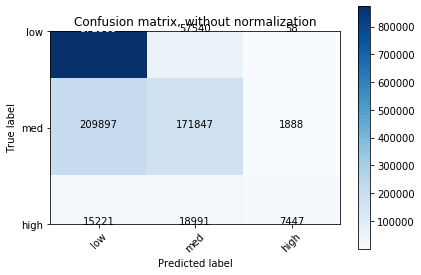

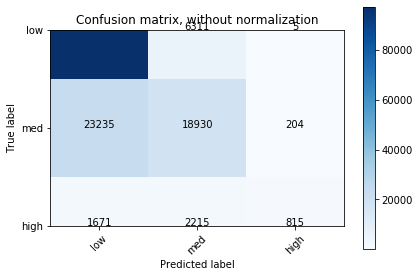

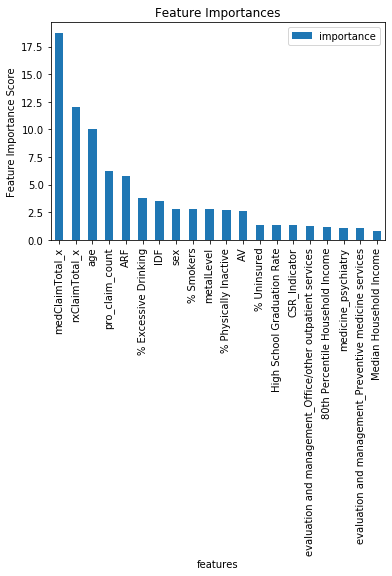

In [59]:
catboost_class14 = CatBoostClassifier(
    iterations=250,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClassOneVsAll',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    thread_count = 4,
    l2_leaf_reg=1,
    random_state=27,
    class_weights = [1, 1, 1, 1],
    ##low, med, high, veryhigh
    metric_period=10
)
modelfit_classification(catboost_class14, X_train, y_train, X_test, y_test, categorical_features_indices, useTrainCV=True, cv_folds=3, early_stopping_rounds=50)

# 1.2: cost training

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.7213405	total: 3.77s	remaining: 15m 37s
10:	learn: 0.7325632	total: 36.8s	remaining: 13m 19s
20:	learn: 0.7367837	total: 1m 10s	remaining: 12m 51s
30:	learn: 0.7401747	total: 1m 41s	remaining: 11m 58s
40:	learn: 0.7424949	total: 2m 15s	remaining: 11m 28s
50:	learn: 0.7441109	total: 2m 46s	remaining: 10m 49s
60:	learn: 0.7454807	total: 3m 17s	remaining: 10m 13s
70:	learn: 0.7465416	total: 3m 49s	remaining: 9m 38s
80:	learn: 0.7475273	total: 4m 21s	remaining: 9m 6s
90:	learn: 0.7482568	total: 4m 54s	remaining: 8m 35s
100:	learn: 0.7490103	total: 5m 26s	remaining: 8m 1s
110:	learn: 0.7496062	total: 5m 59s	remaining: 7m 29s
120:	learn: 0.7501465	total: 6m 31s	remaining: 6m 57s
130:	learn: 0.7507023	total: 7m 2s	remaining: 6m 23s
140:	learn: 0.7511209	total: 7m 34s	remaining: 5m 51s
150:	learn: 0.7515107	total: 8m 6s	remaining: 5m 19s
160:	learn: 0.7518772	total: 8m 39s	remaining: 4m 47s
170:	learn: 0.7522655	total: 9m 11s	remaining: 4m 14s
180:	learn: 0.7526173	total: 9m 43s	re

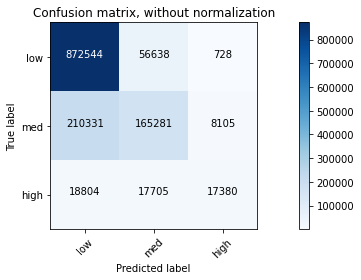

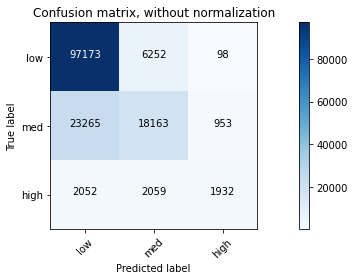

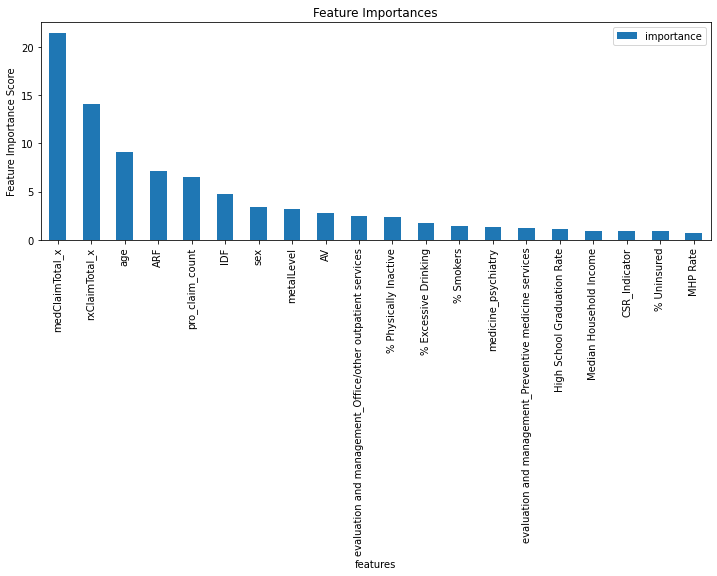

In [25]:
catboost_class14 = CatBoostClassifier(
    iterations=250,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClassOneVsAll',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    thread_count = 4,
    l2_leaf_reg=1,
    random_state=27,
    class_weights = [2, 1, 1],
    ## high, low, med
    metric_period=10
)
modelfit_classification(catboost_class14, X_train, y_train, X_test, y_test, categorical_features_indices, useTrainCV=True, cv_folds=3, early_stopping_rounds=50)

In [26]:
joblib.dump(catboost_class14, 'Pickles/catboost_ACA_NewMember_cost_month01.pkl')

['Pickles/catboost_ACA_NewMember_cost_month01.pkl']

# 2.0: risk model - catboost

In [15]:
df_final = df_final[np.abs(df_final['TotalRiskTarget']-df_final['TotalRiskTarget'].mean()) <= (3*df_final['TotalRiskTarget'].std())]

In [16]:
df_final.loc[df_final['TotalRiskTarget'] < 1, 'riskCatActual'] = 'low'
df_final.loc[df_final['TotalRiskTarget'] >= 3, 'riskCatActual'] = 'high'
df_final.fillna({'riskCatActual':'med'}, inplace = True)

In [17]:
df_final['riskCatActual'].value_counts()

low     1124472
med      193410
high     178770
Name: riskCatActual, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_final[features], df_final['riskCatActual'], test_size=0.1,random_state=5)
categorical_features_indices = np.where(df_final[features].dtypes != np.float)[0]

In [19]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [20]:
def modelfit_classification(alg, X_train, y_train, X_test, y_test, categorical_features_indices, useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, categorical_features_indices)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Predict test set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_train, dtrain_predictions))
    print(classification_report(y_train, dtrain_predictions))
    print(confusion_matrix(y_train, dtrain_predictions, labels = ['low', 'med', 'high']))
    cnf_matrix = confusion_matrix(y_train, dtrain_predictions, labels = ['low', 'med', 'high'])
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['low', 'med', 'high'],
                      title='Confusion matrix, without normalization')
    
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_test.values, dtest_predictions))
    print(classification_report(y_test, dtest_predictions))
    print(confusion_matrix(y_test, dtest_predictions, labels = ['low', 'med', 'high']))
    cnf_matrix = confusion_matrix(y_test, dtest_predictions, labels = ['low', 'med', 'high'])
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['low', 'med', 'high'],
                      title='Confusion matrix, without normalization')
                    
    feat_imp = pd.DataFrame({'features':features})
    feat_imp['importance'] = alg.feature_importances_
    feat_imp = feat_imp.sort_values(by = 'importance', ascending=False).head(20)
    feat_imp.plot(x='features', y='importance', kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

0:	learn: 0.6468305	total: 9.92s	remaining: 41m 11s
10:	learn: 0.6598871	total: 1m 51s	remaining: 40m 28s
20:	learn: 0.6687456	total: 3m 36s	remaining: 39m 20s
30:	learn: 0.6753381	total: 5m 31s	remaining: 39m
40:	learn: 0.6798816	total: 7m 28s	remaining: 38m 6s
50:	learn: 0.6833577	total: 9m 23s	remaining: 36m 38s
60:	learn: 0.6862273	total: 11m 21s	remaining: 35m 10s
70:	learn: 0.6892010	total: 13m 16s	remaining: 33m 28s
80:	learn: 0.6910895	total: 15m 13s	remaining: 31m 44s
90:	learn: 0.6930886	total: 17m 9s	remaining: 29m 58s
100:	learn: 0.6944954	total: 19m 5s	remaining: 28m 9s
110:	learn: 0.6960462	total: 21m	remaining: 26m 17s
120:	learn: 0.6971670	total: 22m 55s	remaining: 24m 26s
130:	learn: 0.6984234	total: 24m 52s	remaining: 22m 35s
140:	learn: 0.6991447	total: 26m 48s	remaining: 20m 43s
150:	learn: 0.6999605	total: 28m 45s	remaining: 18m 50s
160:	learn: 0.7006075	total: 30m 40s	remaining: 16m 57s
170:	learn: 0.7012152	total: 32m 37s	remaining: 15m 4s
180:	learn: 0.7018193	t

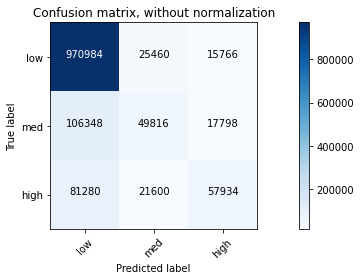

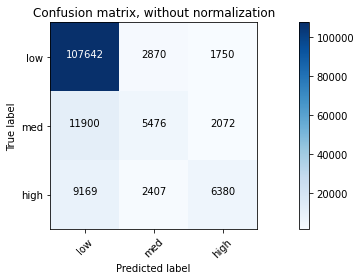

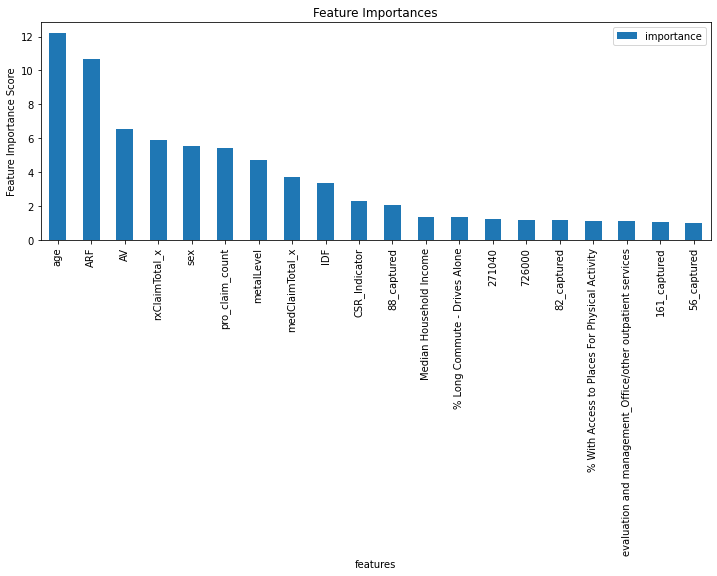

In [38]:
catclass_risk21 = CatBoostClassifier(
    iterations=250,
    learning_rate=0.1,
    random_strength=0.1,
    depth=10,
    loss_function='MultiClassOneVsAll',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    thread_count = 4,
    class_weights = [2, 1, 2],
    ## high, low, med
    metric_period=10
)
modelfit_classification(catclass_risk21, X_train, y_train, X_test, y_test, categorical_features_indices, useTrainCV=True, cv_folds=3, early_stopping_rounds=50)

0:	learn: 0.7674616	total: 9.7s	remaining: 40m 14s
10:	learn: 0.7739242	total: 1m 49s	remaining: 39m 40s
20:	learn: 0.7787379	total: 3m 33s	remaining: 38m 45s
30:	learn: 0.7821321	total: 5m 21s	remaining: 37m 52s
40:	learn: 0.7855932	total: 7m 13s	remaining: 36m 51s
50:	learn: 0.7889904	total: 9m 9s	remaining: 35m 43s
60:	learn: 0.7911626	total: 11m 4s	remaining: 34m 18s
70:	learn: 0.7928494	total: 13m 2s	remaining: 32m 52s
80:	learn: 0.7940439	total: 15m	remaining: 31m 17s
90:	learn: 0.7958383	total: 16m 54s	remaining: 29m 32s
100:	learn: 0.7967744	total: 18m 49s	remaining: 27m 45s
110:	learn: 0.7979274	total: 20m 45s	remaining: 25m 59s
120:	learn: 0.7989214	total: 22m 42s	remaining: 24m 12s
130:	learn: 0.7996445	total: 24m 38s	remaining: 22m 23s
140:	learn: 0.8005941	total: 26m 31s	remaining: 20m 30s
150:	learn: 0.8011724	total: 28m 27s	remaining: 18m 39s
160:	learn: 0.8016802	total: 30m 25s	remaining: 16m 48s
170:	learn: 0.8021197	total: 32m 22s	remaining: 14m 57s
180:	learn: 0.8027

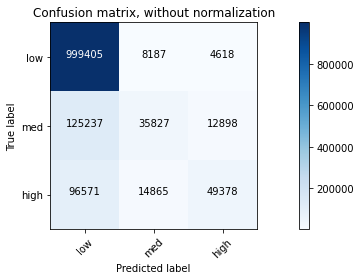

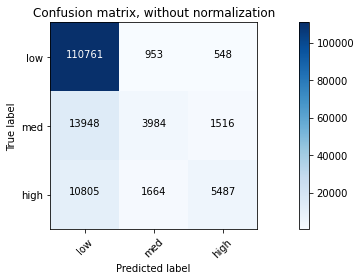

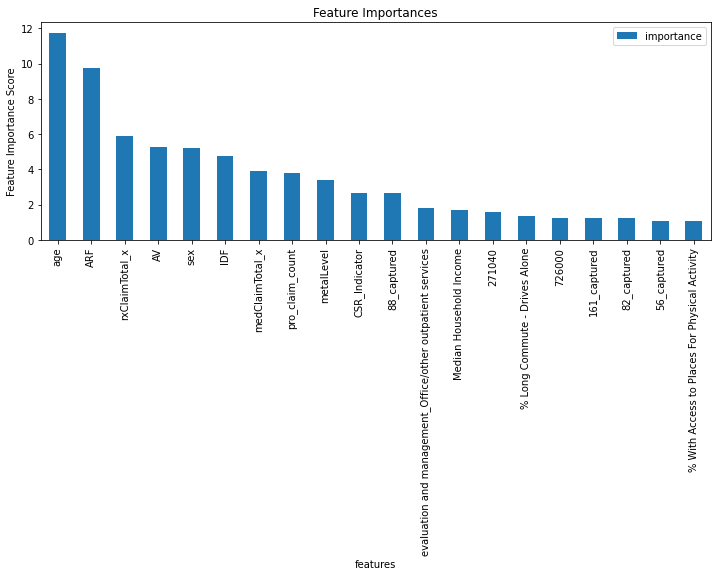

In [22]:
catclass_risk21 = CatBoostClassifier(
    iterations=250,
    learning_rate=0.1,
    random_strength=0.1,
    depth=10,
    loss_function='MultiClassOneVsAll',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    thread_count = 4,
    class_weights = [1, 1, 1],
    ## high, low, med
    metric_period=10
)
modelfit_classification(catclass_risk21, X_train, y_train, X_test, y_test, categorical_features_indices, useTrainCV=True, cv_folds=3, early_stopping_rounds=50)

In [23]:
joblib.dump(catclass_risk21, 'Pickles/catboost_ACA_NewMember_risk_month01.pkl')

['Pickles/catboost_ACA_NewMember_risk_month01.pkl']

# 3.0: Drop XGBoost Model

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_final[features], df_final['drops'], test_size=0.1,random_state=5)

In [10]:
len(df_final['drops'])/sum(df_final['drops'])

87.25816231343283

In [11]:
##check for non int, float, or categorical data types
df_final[features].select_dtypes('object')

""
0
1
2
3
4
...
1496647
1496648
1496649
1496650


In [12]:
def modelfit_classification(alg, X_train, y_train, X_test, y_test, useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Predict test set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_train, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))
    print(classification_report(y_train, dtrain_predictions))
    print(confusion_matrix(y_train, dtrain_predictions))
    
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_test.values, dtest_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(y_test, dtest_predprob))
    print(classification_report(y_test, dtest_predictions))
    print(confusion_matrix(y_test, dtest_predictions))
                    
    feat_imp = pd.DataFrame({'features':features})
    feat_imp['importance'] = alg.feature_importances_
    feat_imp = feat_imp.sort_values(by = 'importance', ascending=False).head(20)
    feat_imp.plot(x='features', y='importance', kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9844
AUC Score (Train): 0.900009
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1331578
           1       0.28      0.23      0.25     15408

    accuracy                           0.98   1346986
   macro avg       0.64      0.61      0.62   1346986
weighted avg       0.98      0.98      0.98   1346986

[[1322474    9104]
 [  11882    3526]]

Model Report
Accuracy : 0.9838
AUC Score (Train): 0.891577
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    147922
           1       0.26      0.21      0.23      1744

    accuracy                           0.98    149666
   macro avg       0.63      0.60      0.61    149666
weighted avg       0.98      0.98      0.98    149666

[[146863   1059]
 [  1373    371]]
CPU times: user 31min 15s, sys: 6.92 s, total: 31min 22s
Wall time: 8min 11s


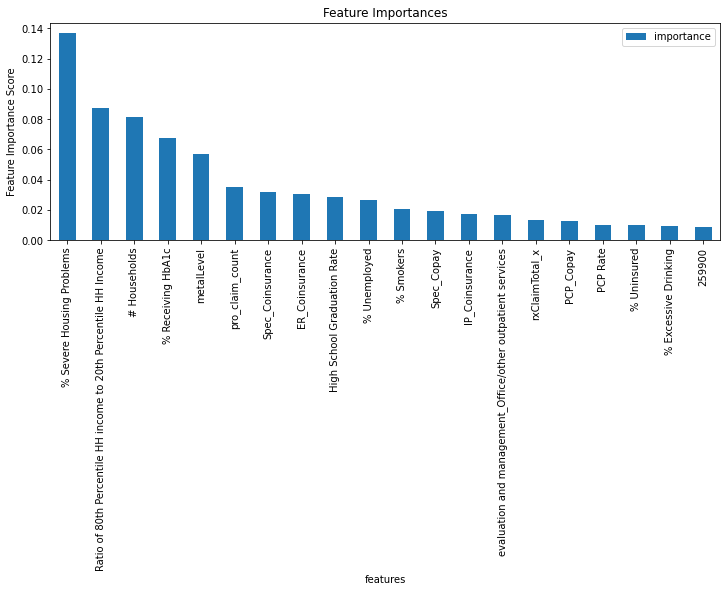

In [13]:
%%time
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=50,
 n_jobs=4,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=4.8,
 max_delta_step=8,
 reg_alpha=100,
 seed=27)
modelfit_classification(xgb5, X_train, y_train, X_test, y_test, useTrainCV=False, cv_folds=3, early_stopping_rounds=50)

In [51]:
joblib.dump(xgb5, 'Pickles/xgboost_ACA_NewMember_drop_month01.pkl')

['Pickles/xgboost_ACA_NewMember_drop_month01.pkl']

In [52]:
xgb5.save_model('Pickles/xgboost_ACA_NewMember_drop_month01.model')

In [14]:
xgb5.save_model('Pickles/xgboost_ACA_NewMember_drop_month01.json')

In [36]:
pd.DataFrame(xgb5.get_booster().feature_names,columns=['features']).to_csv('Pickles/features_model1.csv')

In [37]:
df_features = pd.read_csv('Pickles/features_model1.csv')

In [39]:
df_features['features'].to_list()

['metalLevel',
 'age',
 'sex',
 'CSR_Indicator',
 'ARF',
 'AV',
 'GCF',
 'IDF',
 'relationship',
 'Drug_MOOP',
 'Drug_Deductible',
 'ER_Coinsurance',
 'ER_Copay',
 'IP_Coinsurance',
 'IP_Copay',
 'Med_Deductible',
 'Med_MOOP',
 'OP_Coinsurance',
 'OP_Copay',
 'PCP_Coinsurance',
 'PCP_Copay',
 'Spec_Coinsurance',
 'Spec_Copay',
 'UrgentCare_Coinsurance',
 'UrgentCare_Copay',
 'pro_claim_count',
 'op_claim_count',
 'ip_claim_count',
 'medClaimTotal_x',
 'rxClaimTotal_x',
 '1_noncaptured',
 '2_noncaptured',
 '3_noncaptured',
 '4_noncaptured',
 '6_noncaptured',
 '8_noncaptured',
 '9_noncaptured',
 '10_noncaptured',
 '11_noncaptured',
 '12_noncaptured',
 '13_noncaptured',
 '18_noncaptured',
 '19_noncaptured',
 '20_noncaptured',
 '21_noncaptured',
 '23_noncaptured',
 '26_noncaptured',
 '27_noncaptured',
 '28_noncaptured',
 '29_noncaptured',
 '30_noncaptured',
 '34_noncaptured',
 '35_noncaptured',
 '36_noncaptured',
 '37_noncaptured',
 '38_noncaptured',
 '41_noncaptured',
 '42_noncaptured',
 